In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def divided_Diferences(points, predict_x):
    coefficients_matrix = np.zeros((len(points), len(points)+1))
    total = points[0][1]
    polinom = predict_x - points[0][0]
    for i in range(len(points)):
        coefficients_matrix[i][0] = points[i][0]
        coefficients_matrix[i][1] = points[i][1]
    for i in range(1, len(points)):
        for j in range(2, i+2):
            coefficients_matrix[i][j] = ( coefficients_matrix[i][j-1] - coefficients_matrix[i-1][j-1] ) / (coefficients_matrix[i][0] - coefficients_matrix[i-(j-1)][0])
    for i in range(1, (len(points))):
        total +=  coefficients_matrix[i, i+1]*polinom
        polinom *= (predict_x -  coefficients_matrix[i][0])
    return total 

In [129]:
def lagrange(points, predict_x):
    points = list(zip(*points))
    xpoints = points[0]
    ypoints = points[1]
    dividers = []
    results=[]
    dividers.append(xpoints[0]- xpoints[1])
    for i in range(2, len(xpoints)):
         dividers[0] *= xpoints[0] - xpoints[i]
    for i in range(1, len(xpoints)):
        dividers.append(xpoints[i]-xpoints[0])
        for j in range(1, len(xpoints)):
            dividers[i] *= (xpoints[i] - xpoints[j] )if i != j else 1
    numerator =  predict_x - xpoints[1]
    for i in range(2, len(xpoints)):
         numerator *= predict_x - xpoints[i]
    results.append(numerator * ypoints[i] / dividers[i])
    for i in range(1, len(xpoints)):
        numerator = predict_x - xpoints[0]
        for j in range(1, len(xpoints)):
            numerator *= (predict_x - xpoints[j]) if i != j else 1
        results.append(numerator * ypoints[i] / dividers[i])
    return sum(results)
        

In [130]:
predictX = 1.45
points = [(1, 0.6747), (1.2, 0.8491), (1.4, 1.1214), (1.6, 1.4921), (1.8, 1.9607), (2, 2.5258)]
result = divided_Diferences(points, predictX)
result2 = lagrange(points, predictX)
result2

1.1747703857421874

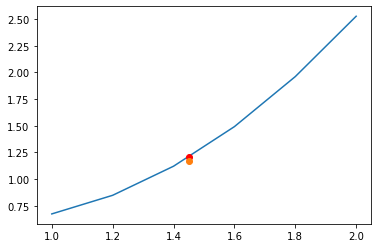

In [136]:
coordinates = list(zip(*points))
plt.plot(coordinates[0], coordinates[1])
plt.plot(predictX, result, 'ro')
plt.plot(predictX, result2, 'o')